# Contents
This notebook contains the original dataset downloaded from Kaggle and is pre pre-processed and transformed. The last ten columns are the individual's race and education level in binary, towards the end of this code, those columns are grouped into their own column.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("../Data_CSVs/Official_Salary.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [5]:
data = df.drop(columns =['timestamp', 'level', 'tag','Race', 'otherdetails', 'cityid', 'dmaid', 'rowNumber', 'Education'])
data.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(62642, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   title                    62642 non-null  object 
 2   totalyearlycompensation  62642 non-null  int64  
 3   location                 62642 non-null  object 
 4   yearsofexperience        62642 non-null  float64
 5   yearsatcompany           62642 non-null  float64
 6   basesalary               62642 non-null  int64  
 7   stockgrantvalue          62642 non-null  float64
 8   bonus                    62642 non-null  float64
 9   gender                   43102 non-null  object 
 10  Masters_Degree           62642 non-null  int64  
 11  Bachelors_Degree         62642 non-null  int64  
 12  Doctorate_Degree         62642 non-null  int64  
 13  Highschool               62642 non-null  int64  
 14  Some_College          

# Data Preprocessing

# Getting rid of NaN Values

In [8]:
data.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
dtype: int64

In [9]:
data1=data.dropna()
data1

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,0,0,0,0,0,0,0,0,0,0
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,0,0,0,0,0,0,0,0,0,0
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,0,0,0,0,0,0,0,0,0,0
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,0,0,0,0,0,0,0,0,0,0
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0


In [10]:
data1.shape

(43098, 20)

In [11]:
data1.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

# Getting rid of  salary outliers

Only focused on getting rid of the outliers in the base salary column as it is a focal point to our data study 

In [12]:
data1.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,4.309800e+04,43098.000000,43098.000000,4.309800e+04,4.309800e+04,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000,43098.000000
mean,2.098304e+05,7.095531,2.674921,1.359611e+05,4.944685e+04,19077.574708,0.320084,0.275581,0.035454,0.007193,0.008075,0.271544,0.185693,0.018470,0.015894,0.026057
std,1.347862e+05,5.848720,3.247232,5.888816e+04,7.783543e+04,26566.573108,0.466514,0.446812,0.184927,0.084506,0.089496,0.444761,0.388863,0.134643,0.125067,0.159306
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.310000e+05,3.000000,0.000000,1.070000e+05,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.840000e+05,6.000000,2.000000,1.380000e+05,2.400000e+04,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.550000e+05,10.000000,4.000000,1.650000e+05,6.200000e+04,26000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,45.000000,40.000000,1.620000e+06,2.000000e+06,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([3.1233e+04, 1.1624e+04, 1.7200e+02, 4.7000e+01, 1.7000e+01,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0.,  162000.,  324000.,  486000.,  648000.,  810000.,
         972000., 1134000., 1296000., 1458000., 1620000.]),
 <BarContainer object of 10 artists>)

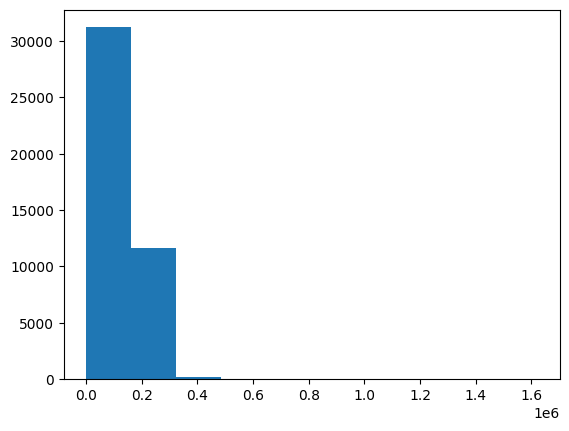

In [13]:
plt.hist(data1.basesalary)

In [14]:
data1['basesalary'].shape

(43098,)

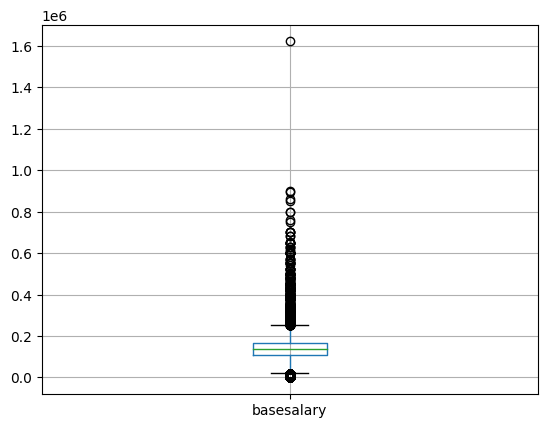

In [15]:
data1.boxplot(column='basesalary')
plt.show()

In [16]:
lower_bound = 0.0231
upper_bound = 0.9995
res = data1.basesalary.quantile([lower_bound, upper_bound])
res


0.0231      6000.0
0.9995    639030.0
Name: basesalary, dtype: float64

In [17]:
Q1 = data1.basesalary.quantile(0.21)
Q3 = data1.basesalary.quantile(0.75)

In [18]:
Q1, Q3

(100000.0, 165000.0)

In [19]:
IQR = Q3 - Q1 

In [20]:
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit, upper_limit

(2500.0, 262500.0)

In [21]:
outliers=data1[(data1.basesalary<lower_limit)|(data1.basesalary>upper_limit)]
outliers

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
282,Intel,Software Engineer,170000,"Folsom, CA",7.0,6.0,0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
283,Amazon,Product Manager,164000,"Seattle, WA",6.0,1.5,0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
294,Amazon,Software Engineer,300000,"Seattle, WA",3.0,1.0,0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
307,Pinterest,Software Engineer,255000,"San Francisco, CA",2.0,2.0,0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
311,Intel,Software Engineer,120000,"Santa Clara, CA",5.0,5.0,0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62035,Netflix,Software Engineer,399000,"Los Gatos, CA",7.0,0.0,380000,19000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
62101,Netflix,Software Engineer,393000,"Los Gatos, CA",8.0,0.0,375000,18750.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
62132,Netflix,Software Engineer,430000,"Los Gatos, CA",10.0,2.0,410000,20500.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
62135,Netflix,Software Engineer,440000,"Los Gatos, CA",7.0,0.0,425000,21000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0


In [22]:
no_outliers_data = data1[(data1.basesalary>lower_limit)&(data1.basesalary<upper_limit)]
no_outliers_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,0,0,0,0,0,0,0,0,0,0
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,0,0,0,0,0,0,0,0,0,0
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,0,0,0,0,0,0,0,0,0,0
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,0,0,0,0,0,0,0,0,0,0
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0


In [23]:
no_outliers_data['Masters_Degree']


264      0
265      0
266      0
269      0
270      0
        ..
62610    0
62611    0
62612    0
62613    0
62641    0
Name: Masters_Degree, Length: 41504, dtype: int64

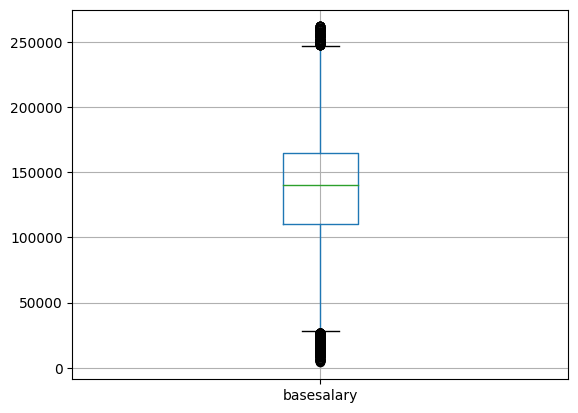

In [24]:
no_outliers_data.boxplot(column='basesalary')
plt.show()

(array([1053., 1645., 2534., 4644., 8712., 9577., 7267., 4000., 1365.,
         707.]),
 array([  4000.,  29800.,  55600.,  81400., 107200., 133000., 158800.,
        184600., 210400., 236200., 262000.]),
 <BarContainer object of 10 artists>)

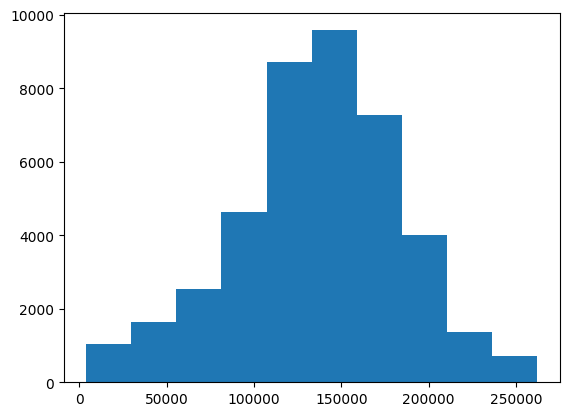

In [25]:
plt.hist(no_outliers_data.basesalary)

# Education and Race Columns

In [26]:
no_outliers_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,0,0,0,0,0,0,0,0,0,0
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,0,0,0,0,0,0,0,0,0,0
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,0,0,0,0,0,0,0,0,0,0
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,0,0,0,0,0,0,0,0,0,0
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0


Groupby for Degrees and Race

In [27]:
noout_data = no_outliers_data

In [28]:
noout_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,0,0,0,0,0,0,0,0,0,0
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,0,0,0,0,0,0,0,0,0,0
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,0,0,0,0,0,0,0,0,0,0
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,0,0,0,0,0,0,0,0,0,0
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0


In [73]:
# Chaning the binary of 1 and 0 to the respective degree
masters= noout_data['Masters_Degree']= noout_data['Masters_Degree'].apply(lambda x: "Masters Degree" if x==1 else x)
bach= noout_data['Bachelors_Degree']= noout_data['Bachelors_Degree'].apply(lambda x: "Bachelors Degree" if x==1 else x)
doc = noout_data['Doctorate_Degree']= noout_data['Doctorate_Degree'].apply(lambda x: "Doctrates Degree" if x==1 else x)
high= noout_data['Highschool']= noout_data['Highschool'].apply(lambda x: "Highschool Degree" if x==1 else x)
some_col = noout_data['Some_College']= noout_data['Some_College'].apply(lambda x: "Some College" if x==1 else x)


/tmp/ipykernel_2890/938289396.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2890/938289396.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2890/938289396.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2890/93

In [30]:
noout_data['Education_Level'] = noout_data[noout_data.columns[10:15]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

/tmp/ipykernel_2890/2448333437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noout_data['Education_Level'] = noout_data[noout_data.columns[10:15]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)


In [31]:
noout_data['Education_Level'].unique()

array(['0,0,0,0,0', '0,0,Doctrates Degree,0,0', 'Masters Degree,0,0,0,0',
       'Masters Degree,0,Doctrates Degree,0,0',
       '0,Bachelors Degree,0,0,0',
       'Masters Degree,Bachelors Degree,0,0,0', '0,0,0,0,Some College',
       '0,0,0,Highschool Degree,0'], dtype=object)

In [32]:
noout_data['Education_Level'].replace({'0,0,0,0,0': 'No Education', '0,0,Doctrates Degree,0,0': 'Doctrates Degree','Masters Degree,0,0,0,0': 'Masters Degree','Masters Degree,0,Doctrates Degree,0,0': 'Doctrates Degree', '0,Bachelors Degree,0,0,0': 'Bachelors Degree','Masters Degree,Bachelors Degree,0,0,0' :'Masters Degree', '0,0,0,0,Some College':'Some College', '0,0,0,Highschool Degree,0': 'High School'}, inplace=True)

/tmp/ipykernel_2890/985059527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noout_data['Education_Level'].replace({'0,0,0,0,0': 'No Education', '0,0,Doctrates Degree,0,0': 'Doctrates Degree','Masters Degree,0,0,0,0': 'Masters Degree','Masters Degree,0,Doctrates Degree,0,0': 'Doctrates Degree', '0,Bachelors Degree,0,0,0': 'Bachelors Degree','Masters Degree,Bachelors Degree,0,0,0' :'Masters Degree', '0,0,0,0,Some College':'Some College', '0,0,0,Highschool Degree,0': 'High School'}, inplace=True)


In [33]:
noout_data['Education_Level'].unique()

array(['No Education', 'Doctrates Degree', 'Masters Degree',
       'Bachelors Degree', 'Some College', 'High School'], dtype=object)

In [34]:
asian= noout_data['Race_Asian']= noout_data['Race_Asian'].apply(lambda x: "Asian" if x==1 else x)
white= noout_data['Race_White']= noout_data['Race_White'].apply(lambda x: "White" if x==1 else x)
birach = noout_data['Race_Two_Or_More']= noout_data['Race_Two_Or_More'].apply(lambda x: "Biracial" if x==1 else x)
black= noout_data['Race_Black']= noout_data['Race_Black'].apply(lambda x: "Black" if x==1 else x)
hisp = noout_data['Race_Hispanic']= noout_data['Race_Hispanic'].apply(lambda x: "Hispanic" if x==1 else x)


/tmp/ipykernel_2890/691511267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian= noout_data['Race_Asian']= noout_data['Race_Asian'].apply(lambda x: "Asian" if x==1 else x)
/tmp/ipykernel_2890/691511267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white= noout_data['Race_White']= noout_data['Race_White'].apply(lambda x: "White" if x==1 else x)
/tmp/ipykernel_2890/691511267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [35]:
noout_data['Race'] = noout_data[noout_data.columns[15:20]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

/tmp/ipykernel_2890/3920966956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noout_data['Race'] = noout_data[noout_data.columns[15:20]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)


In [36]:
noout_data['Race'].unique()

array(['0,0,0,0,0', '0,White,0,0,0', 'Asian,0,0,0,0', '0,0,0,Black,0',
       '0,0,Biracial,0,0', '0,0,0,0,Hispanic', 'Asian,0,0,0,Hispanic'],
      dtype=object)

In [37]:
noout_data['Race'].replace({'0,0,0,0,0': 'N/A','0,White,0,0,0': 'White','Asian,0,0,0,0': 'Asian','0,0,0,Black,0': 'Black', '0,0,Biracial,0,0': 'Biracial', '0,0,0,0,Hispanic':'Hispanic', 'Asian,0,0,0,Hispanic': 'Biracial'}, inplace=True)

/tmp/ipykernel_2890/1855662570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noout_data['Race'].replace({'0,0,0,0,0': 'N/A','0,White,0,0,0': 'White','Asian,0,0,0,0': 'Asian','0,0,0,Black,0': 'Black', '0,0,Biracial,0,0': 'Biracial', '0,0,0,0,Hispanic':'Hispanic', 'Asian,0,0,0,Hispanic': 'Biracial'}, inplace=True)


In [38]:
noout_data['Race'].value_counts()

N/A         19494
Asian       11577
White        7867
Hispanic     1114
Biracial      782
Black         670
Name: Race, dtype: int64

In [39]:
noout_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education_Level,Race
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,...,0,0,0,0,0,0,0,0,No Education,N/A
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,...,0,0,0,0,0,0,0,0,No Education,N/A


In [40]:
all_clean_data = noout_data.drop(columns =['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'])

In [41]:
all_clean_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,No Education,N/A
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,No Education,N/A
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,No Education,N/A
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,No Education,N/A
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,No Education,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,No Education,N/A
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,No Education,N/A
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,No Education,N/A
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,No Education,N/A


# Data Modeling

In [42]:
all_clean_data.to_csv('Cleaned_Official_Data.csv', index= False)

Frequency of Years Worked in Field

In [52]:
x = noout_data['yearsofexperience']
x


264       4.0
265      12.0
266       7.0
269       4.0
270      11.0
         ... 
62610     1.0
62611    14.0
62612    20.0
62613     3.0
62641     0.0
Name: yearsofexperience, Length: 41504, dtype: float64

In [53]:
X = noout_data['yearsofexperience'].value_counts()
X

5.00     3892
3.00     3845
2.00     3825
4.00     3415
0.00     3127
10.00    2915
1.00     2838
6.00     2677
8.00     2397
7.00     2333
15.00    1757
12.00    1400
9.00     1369
20.00    1098
11.00     782
13.00     741
14.00     739
16.00     474
18.00     395
17.00     330
25.00     250
19.00     196
22.00     137
21.00     119
23.00      99
24.00      80
30.00      76
26.00      37
28.00      22
27.00      22
35.00      21
29.00      17
40.00      11
32.00       8
33.00       8
2.50        8
1.50        6
31.00       5
36.00       3
3.50        3
38.00       3
37.00       2
7.50        2
42.00       2
41.00       2
0.25        2
4.50        1
0.60        1
6.50        1
39.00       1
45.00       1
0.50        1
0.58        1
0.30        1
34.00       1
1.60        1
5.50        1
3.80        1
8.50        1
0.80        1
Name: yearsofexperience, dtype: int64

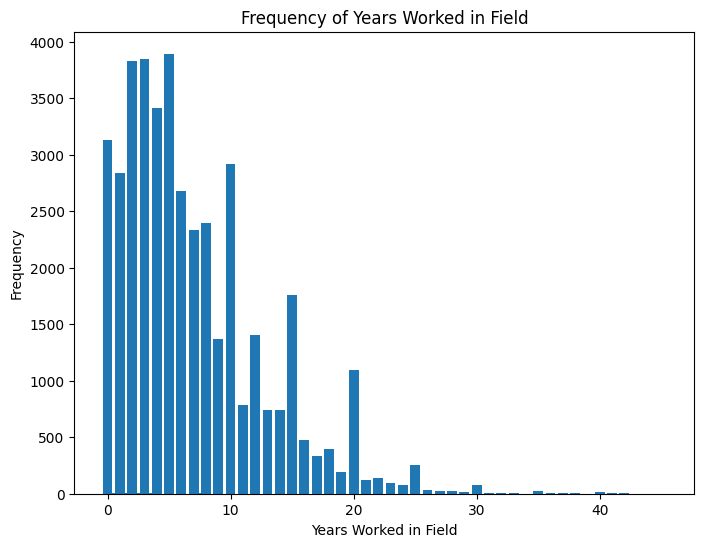

In [54]:
plt.figure(figsize=(8,6))
plt.bar(X.index, X.values)
plt.xlabel('Years Worked in Field')
plt.ylabel('Frequency')
plt.title('Frequency of Years Worked in Field')

plt.show()

Frequency of Genders of Work

In [55]:
y = noout_data['basesalary'].value_counts()
y

160000    1865
150000    1498
130000    1179
120000    1171
140000    1143
          ... 
90100        1
144500       1
132600       1
34300        1
117500       1
Name: basesalary, Length: 303, dtype: int64

In [56]:
z = noout_data['gender'].value_counts()
z

Male      34377
Female     6763
Other       364
Name: gender, dtype: int64

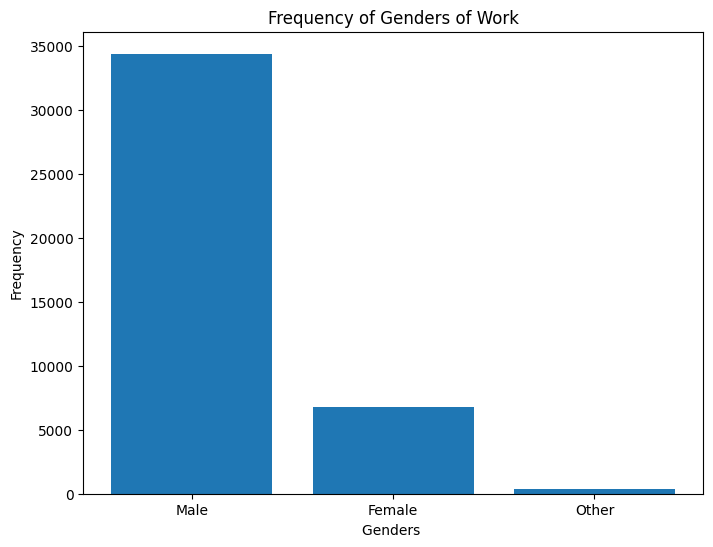

In [75]:
plt.figure(figsize=(8,6))
plt.bar(z.index, z.values)
plt.xlabel('Genders ')
plt.ylabel('Frequency')
plt.title('Frequency of Genders of Work')

plt.show()

Salary vs Experience Plot

In [90]:
yrs = no_outliers_data['yearsofexperience']
sal = no_outliers_data['basesalary']

In [91]:
plt.figure(figsize=(14,10))
fig_data = px.scatter(all_clean_data, sal, yrs )
fig_data.update_layout(title='Salary vs Experience', xaxis_title='Salary', yaxis_title='Years of Experience')
fig_data.show()

<Figure size 1400x1000 with 0 Axes>

# Practice Linear Regression

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
all_clean_data

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
264,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,No Education,N/A
265,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,No Education,N/A
266,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,No Education,N/A
269,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,No Education,N/A
270,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,No Education,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
62610,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,No Education,N/A
62611,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,No Education,N/A
62612,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,No Education,N/A
62613,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,No Education,N/A


In [63]:
X = no_outliers_data['yearsofexperience'].values.reshape(-1,1)
y = sal.values.reshape(-1,1)
X,y

(array([[ 4.],
        [12.],
        [ 7.],
        ...,
        [20.],
        [ 3.],
        [ 0.]]),
 array([[130000],
        [142000],
        [161000],
        ...,
        [200000],
        [106000],
        [155000]]))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
     

LinearRegression()

In [66]:
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

0.17708577556202976

In [67]:
import joblib

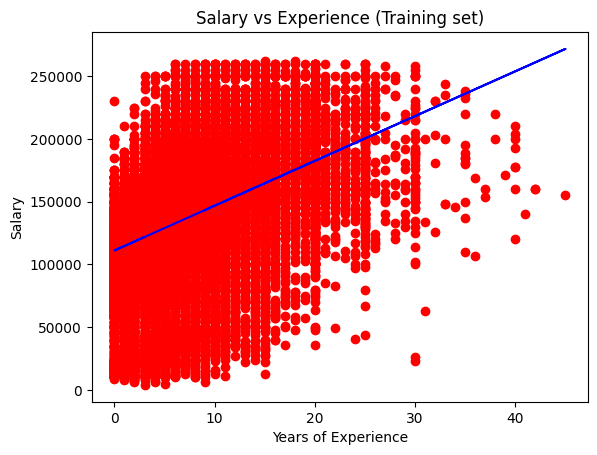

In [92]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

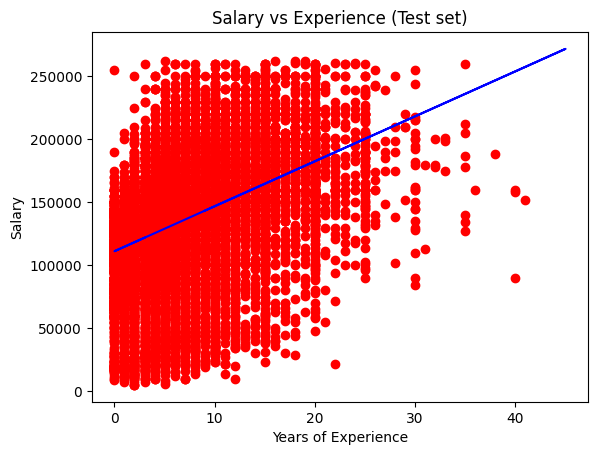

In [93]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
     

In [87]:
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [[164726.48011103]]


In [88]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [89]:
r2

0.17708577556202976